# Import Library & Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/hcvdata.csv')
df

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,3=Cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,3=Cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,3=Cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,3=Cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [ ]:
df.drop('Unnamed: 0', axis=1, inplace = True)

Drop atribut Unnamed:0 karena merupakan sebuah user id yang bersifat unique dan tidak menjadi parameter yang digunakan untuk prediksi

In [ ]:
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


# Data Understanding

1. Category: tipe pasien
2. Age: umur
3. Sex: jenis kelamin
4. ALB: albumin blood test (mencari tahu jumlah albumin dalam darah)
5. ALP: alkaline phosphatase (pemeriksaan kadar enzim ALP dalam darah untuk tes fungsi hati)
6. ALT: alanin aminotransferase (pemeriksaan kadar enzim ALT dalam darah untuk tes fungsi hati)
7. AST: aspartat aminotransferase (pemeriksaan kadar enzim AST dalam darah untuk tes fungsi hati)
8. BIL: bilirubin (mengukur total bilirubin dalam darah -> untuk membantu diagnosis dan evaluasi fungsi hati)
9. CHE: acetylcholinesterase (mengukur tingkat pajanan pestisida dalam darah)
10. CHOL: mengukur kadar kolestrol dalam tubuh
11. CREA: cratinine (mengukur kadar kreatine dalam darah -> semakin sedikit, ginjal berarti sehat)
12. GGT: gamma-glutamyl transferase (pemeriksaan kadar enzim GGT dalam darah untuk tes fungsi hati)
13. PROT: mengukur kadar protein dalam tubuh

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Category  615 non-null    object 
 1   Age       615 non-null    int64  
 2   Sex       615 non-null    object 
 3   ALB       614 non-null    float64
 4   ALP       597 non-null    float64
 5   ALT       614 non-null    float64
 6   AST       615 non-null    float64
 7   BIL       615 non-null    float64
 8   CHE       615 non-null    float64
 9   CHOL      605 non-null    float64
 10  CREA      615 non-null    float64
 11  GGT       615 non-null    float64
 12  PROT      614 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 62.6+ KB


Kita memiliki 11 tipe data numerik dan 2 tipe data katerogikal. Sehingga kita bisa menggunakan Category dan Sex sebagai target data yang akan kita prediksi menggunakan parameter tipe data numerik

In [ ]:
df.nunique()

Category      5
Age          49
Sex           2
ALB         189
ALP         414
ALT         341
AST         297
BIL         188
CHE         407
CHOL        313
CREA        117
GGT         358
PROT        198
dtype: int64

In [ ]:
value_counts = {column: df[column].value_counts() for column in df.columns}

value_counts

{'Category': 0=Blood Donor             533
 3=Cirrhosis                30
 1=Hepatitis                24
 2=Fibrosis                 21
 0s=suspect Blood Donor      7
 Name: Category, dtype: int64,
 'Age': 46    32
 48    28
 33    25
 51    24
 52    22
 50    21
 49    21
 35    21
 38    20
 53    20
 37    20
 43    20
 44    20
 47    20
 56    20
 45    19
 34    19
 59    18
 32    17
 57    16
 36    16
 41    16
 39    15
 40    14
 55    14
 42    13
 54    12
 60    12
 58    10
 61     9
 64     9
 62     8
 65     8
 63     6
 68     4
 66     4
 67     3
 70     3
 71     3
 76     2
 74     2
 29     2
 77     1
 19     1
 23     1
 25     1
 27     1
 30     1
 75     1
 Name: Age, dtype: int64,
 'Sex': m    377
 f    238
 Name: Sex, dtype: int64,
 'ALB': 39.0    14
 41.0    12
 44.7    12
 39.9    12
 46.4    11
         ..
 50.3     1
 37.6     1
 50.8     1
 45.8     1
 24.0     1
 Name: ALB, Length: 189, dtype: int64,
 'ALP': 52.5    5
 61.2    5
 59.5    4
 84.1   

## Handling Missing Value

In [ ]:
df.isnull().sum()

Category     0
Age          0
Sex          0
ALB          1
ALP         18
ALT          1
AST          0
BIL          0
CHE          0
CHOL        10
CREA         0
GGT          0
PROT         1
dtype: int64

Dikarenakan masih banyak missing value, maka kita harus melakukan handling missing value tersebut

In [ ]:
df['ALB'] = df['ALB'].fillna(df.groupby('Category')['ALB'].transform('mean'))
df['ALP'] = df['ALP'].fillna(df.groupby('Category')['ALP'].transform('mean'))
df['ALT'] = df['ALT'].fillna(df.groupby('Category')['ALT'].transform('mean'))
df['CHOL'] = df['CHOL'].fillna(df.groupby('Category')['CHOL'].transform('mean'))
df['PROT'] = df['PROT'].fillna(df.groupby('Category')['PROT'].transform('mean'))

Di atas merupakan salah satu cara handling missing value, yaitu menggunakan mean dari salah satu data kategorikal. Ilustrasinya seperti ini, misalnya pada atribut Category kita memiliki data Hepatitis. Maka kita akan menelusuri data yang hilang itu apakah Category-nya Hepatitis atau bukan. Jika iya, maka kita akan mengambil rata-rata atribut yang hilang dengan tipe Hepatitis pada atribut Category.

In [ ]:
df.isnull().sum()

Category    0
Age         0
Sex         0
ALB         0
ALP         0
ALT         0
AST         0
BIL         0
CHE         0
CHOL        0
CREA        0
GGT         0
PROT        0
dtype: int64

# Data Visualization

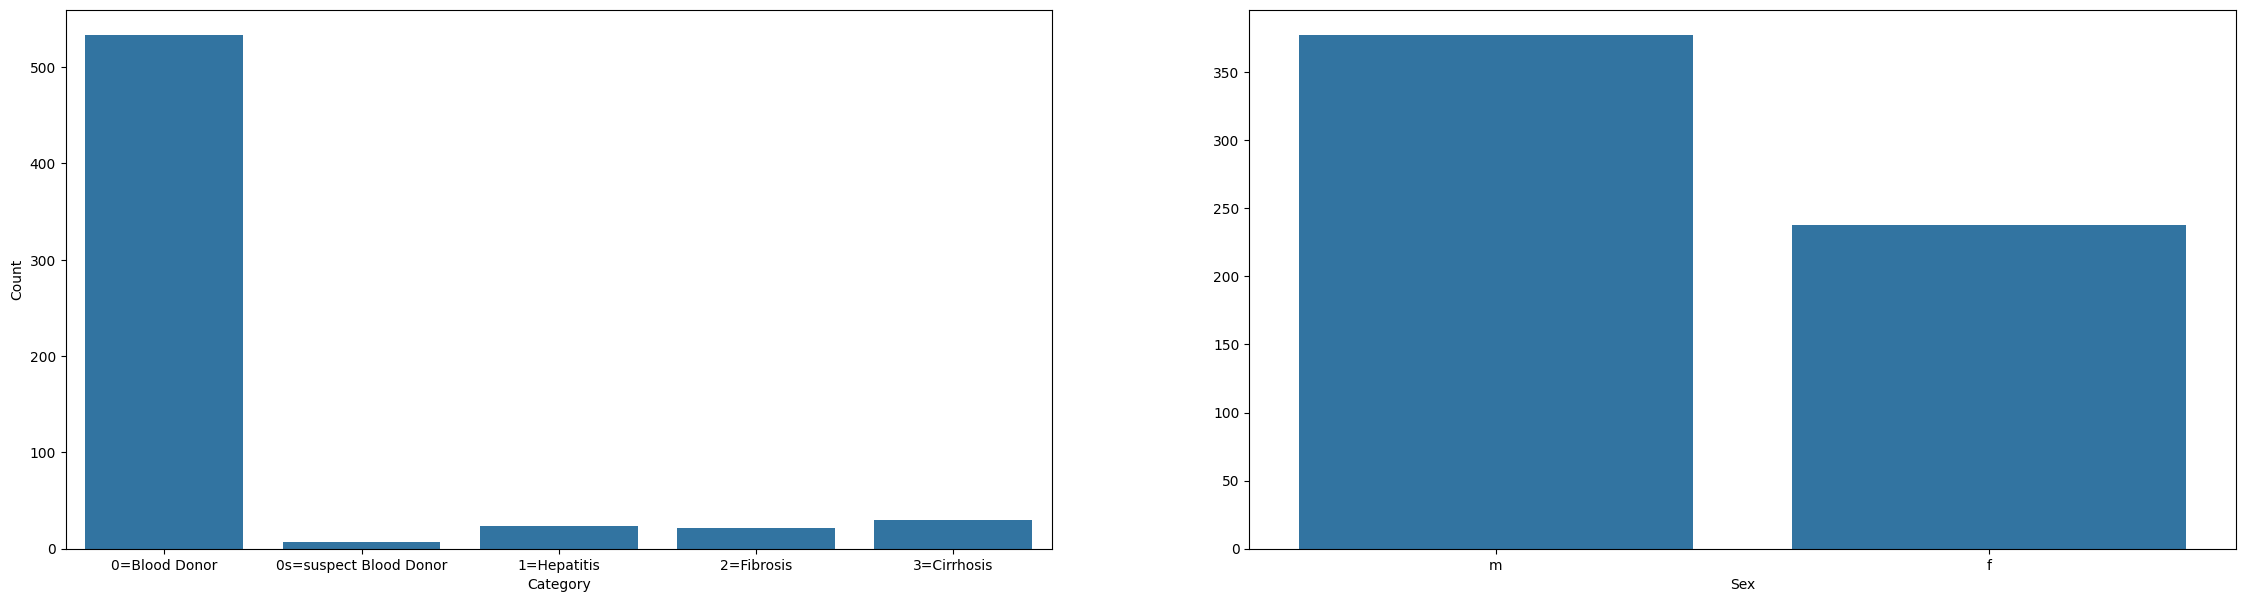

In [ ]:
plt.figure(figsize = (28, 7))
n = 0
for cols in ['Category','Sex']:
    n += 1
    plt.subplot(1 , 2 , n)
    sns.countplot(x=cols, data=df)
    plt.ylabel('Count' if n == 1 else '')
plt.show()

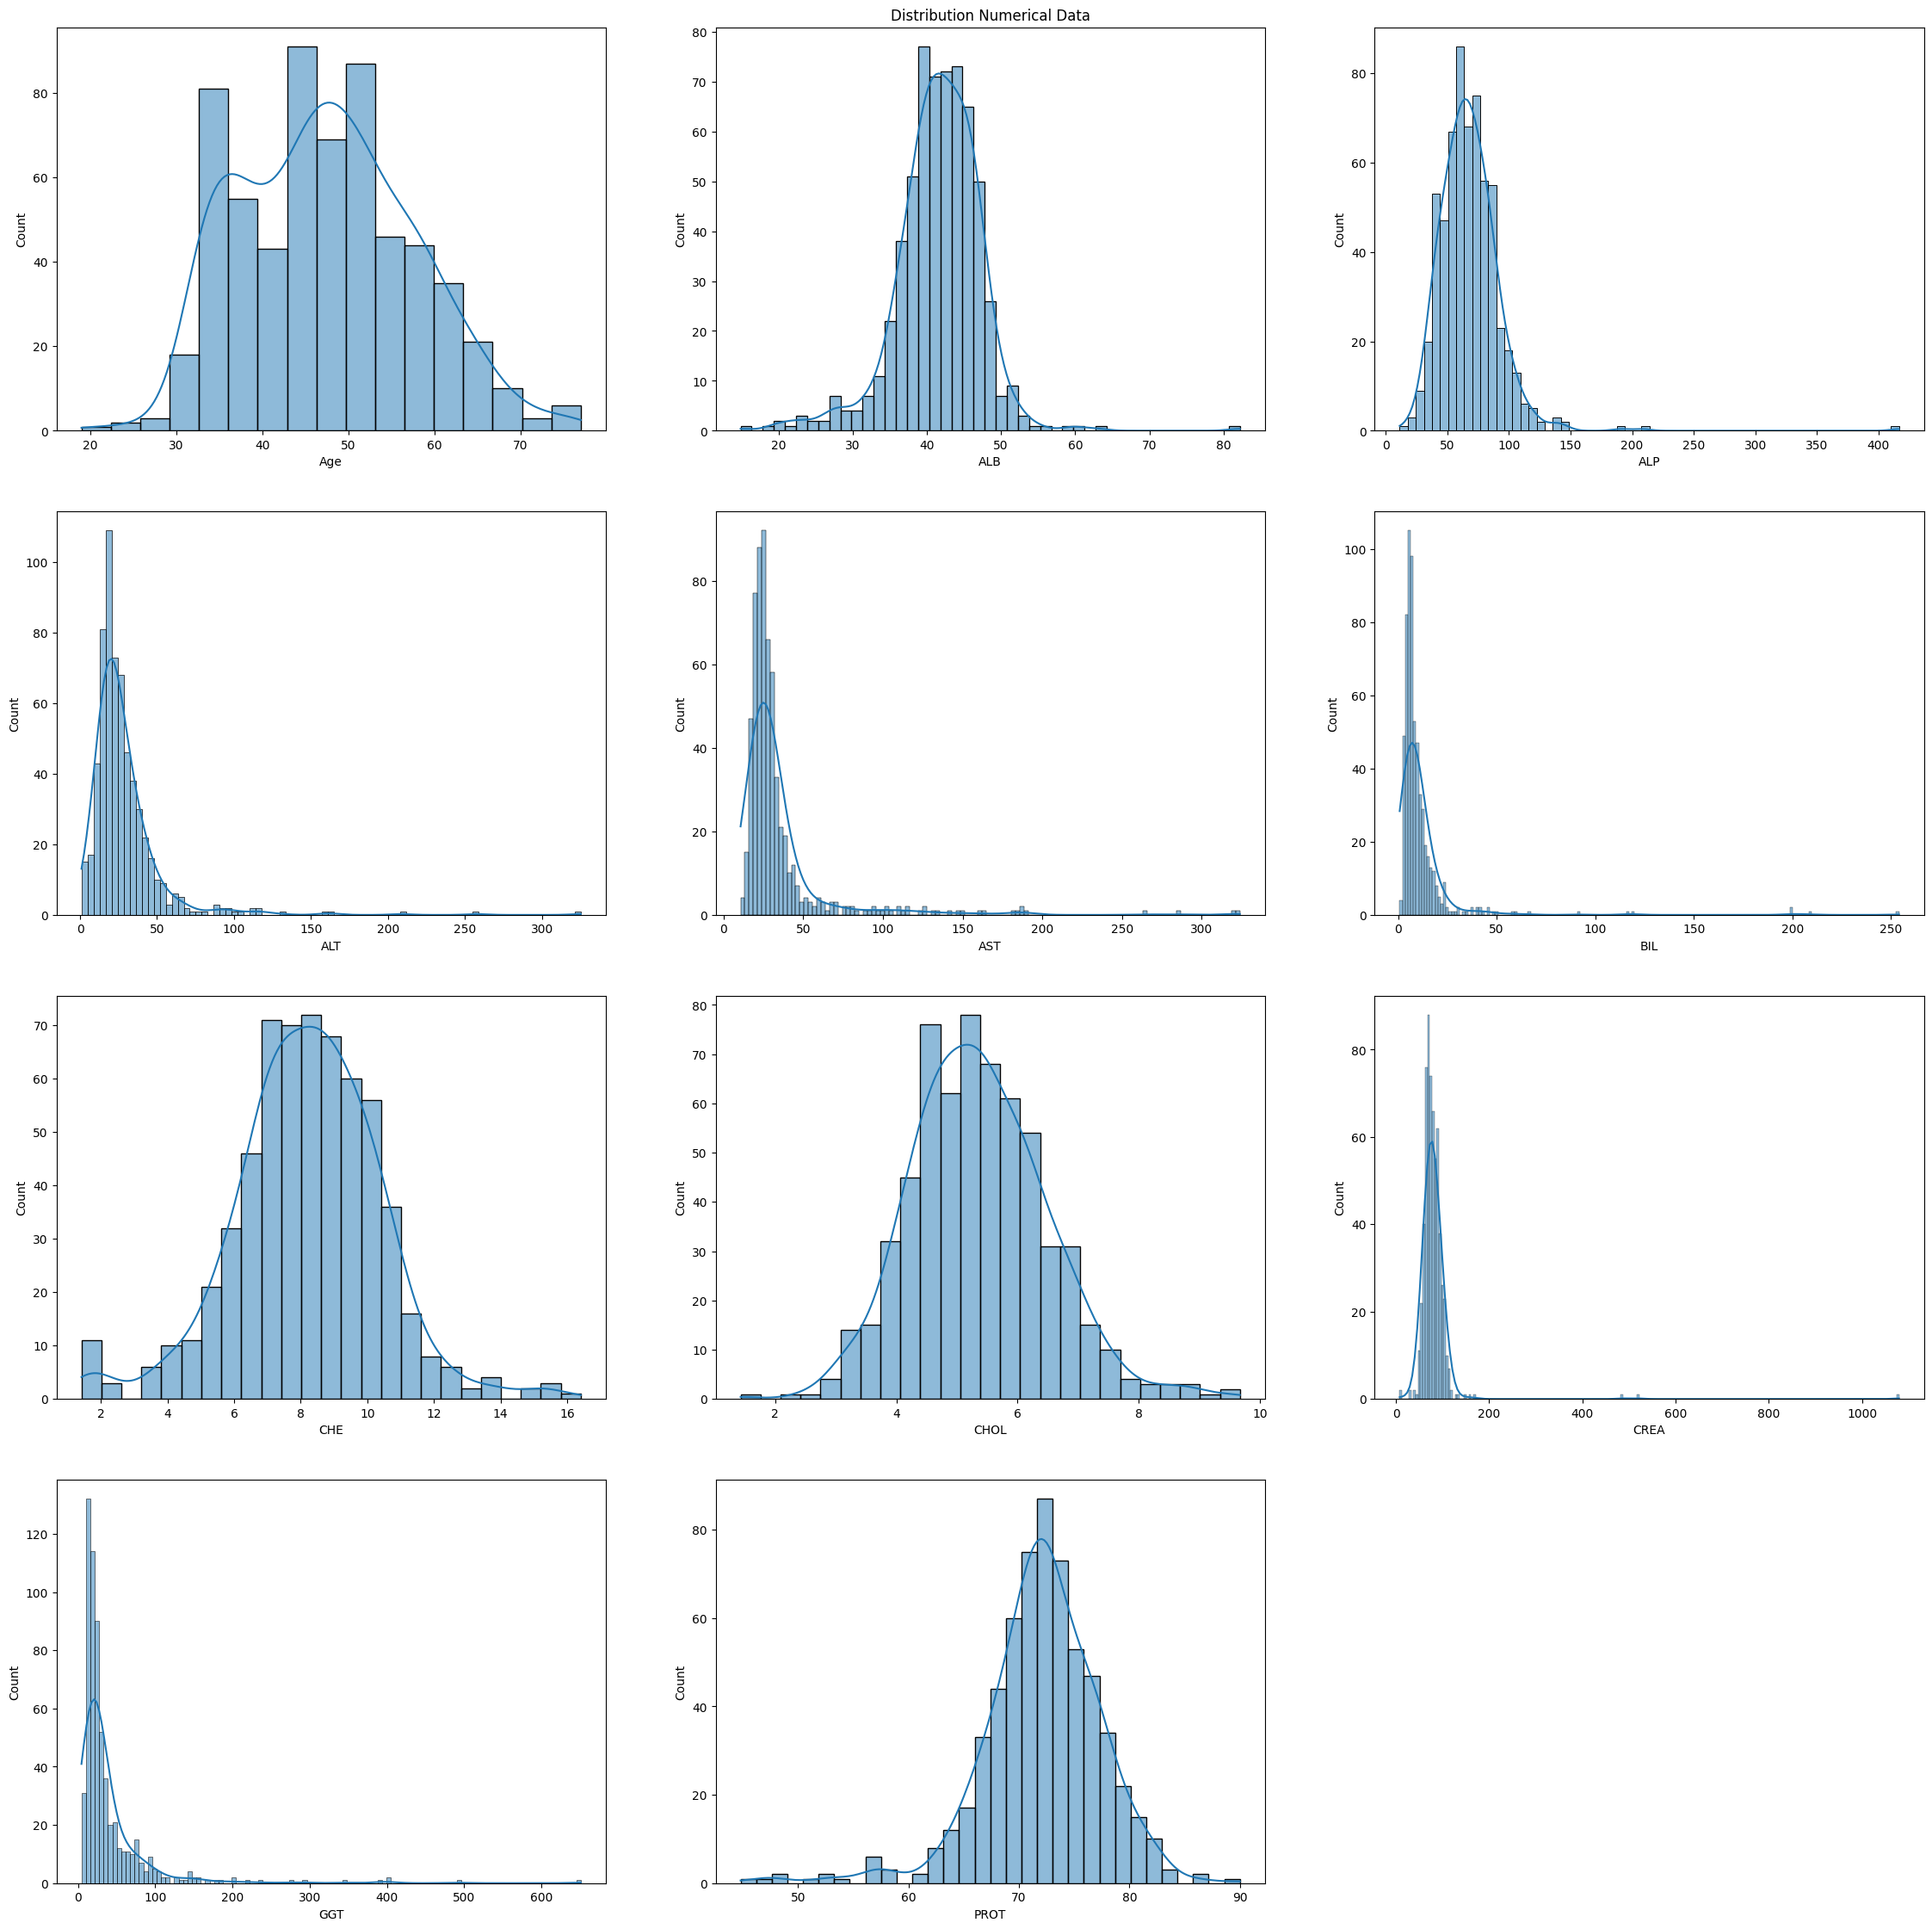

In [ ]:
plt.figure(figsize = (28, 28))
n = 0
for cols in ['Age','ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT','PROT']:
    n += 1
    plt.subplot(4 , 3 , n)
    sns.histplot(df[cols], kde=True)
    plt.title('Distribution Numerical Data' if n == 2 else '')
plt.show()

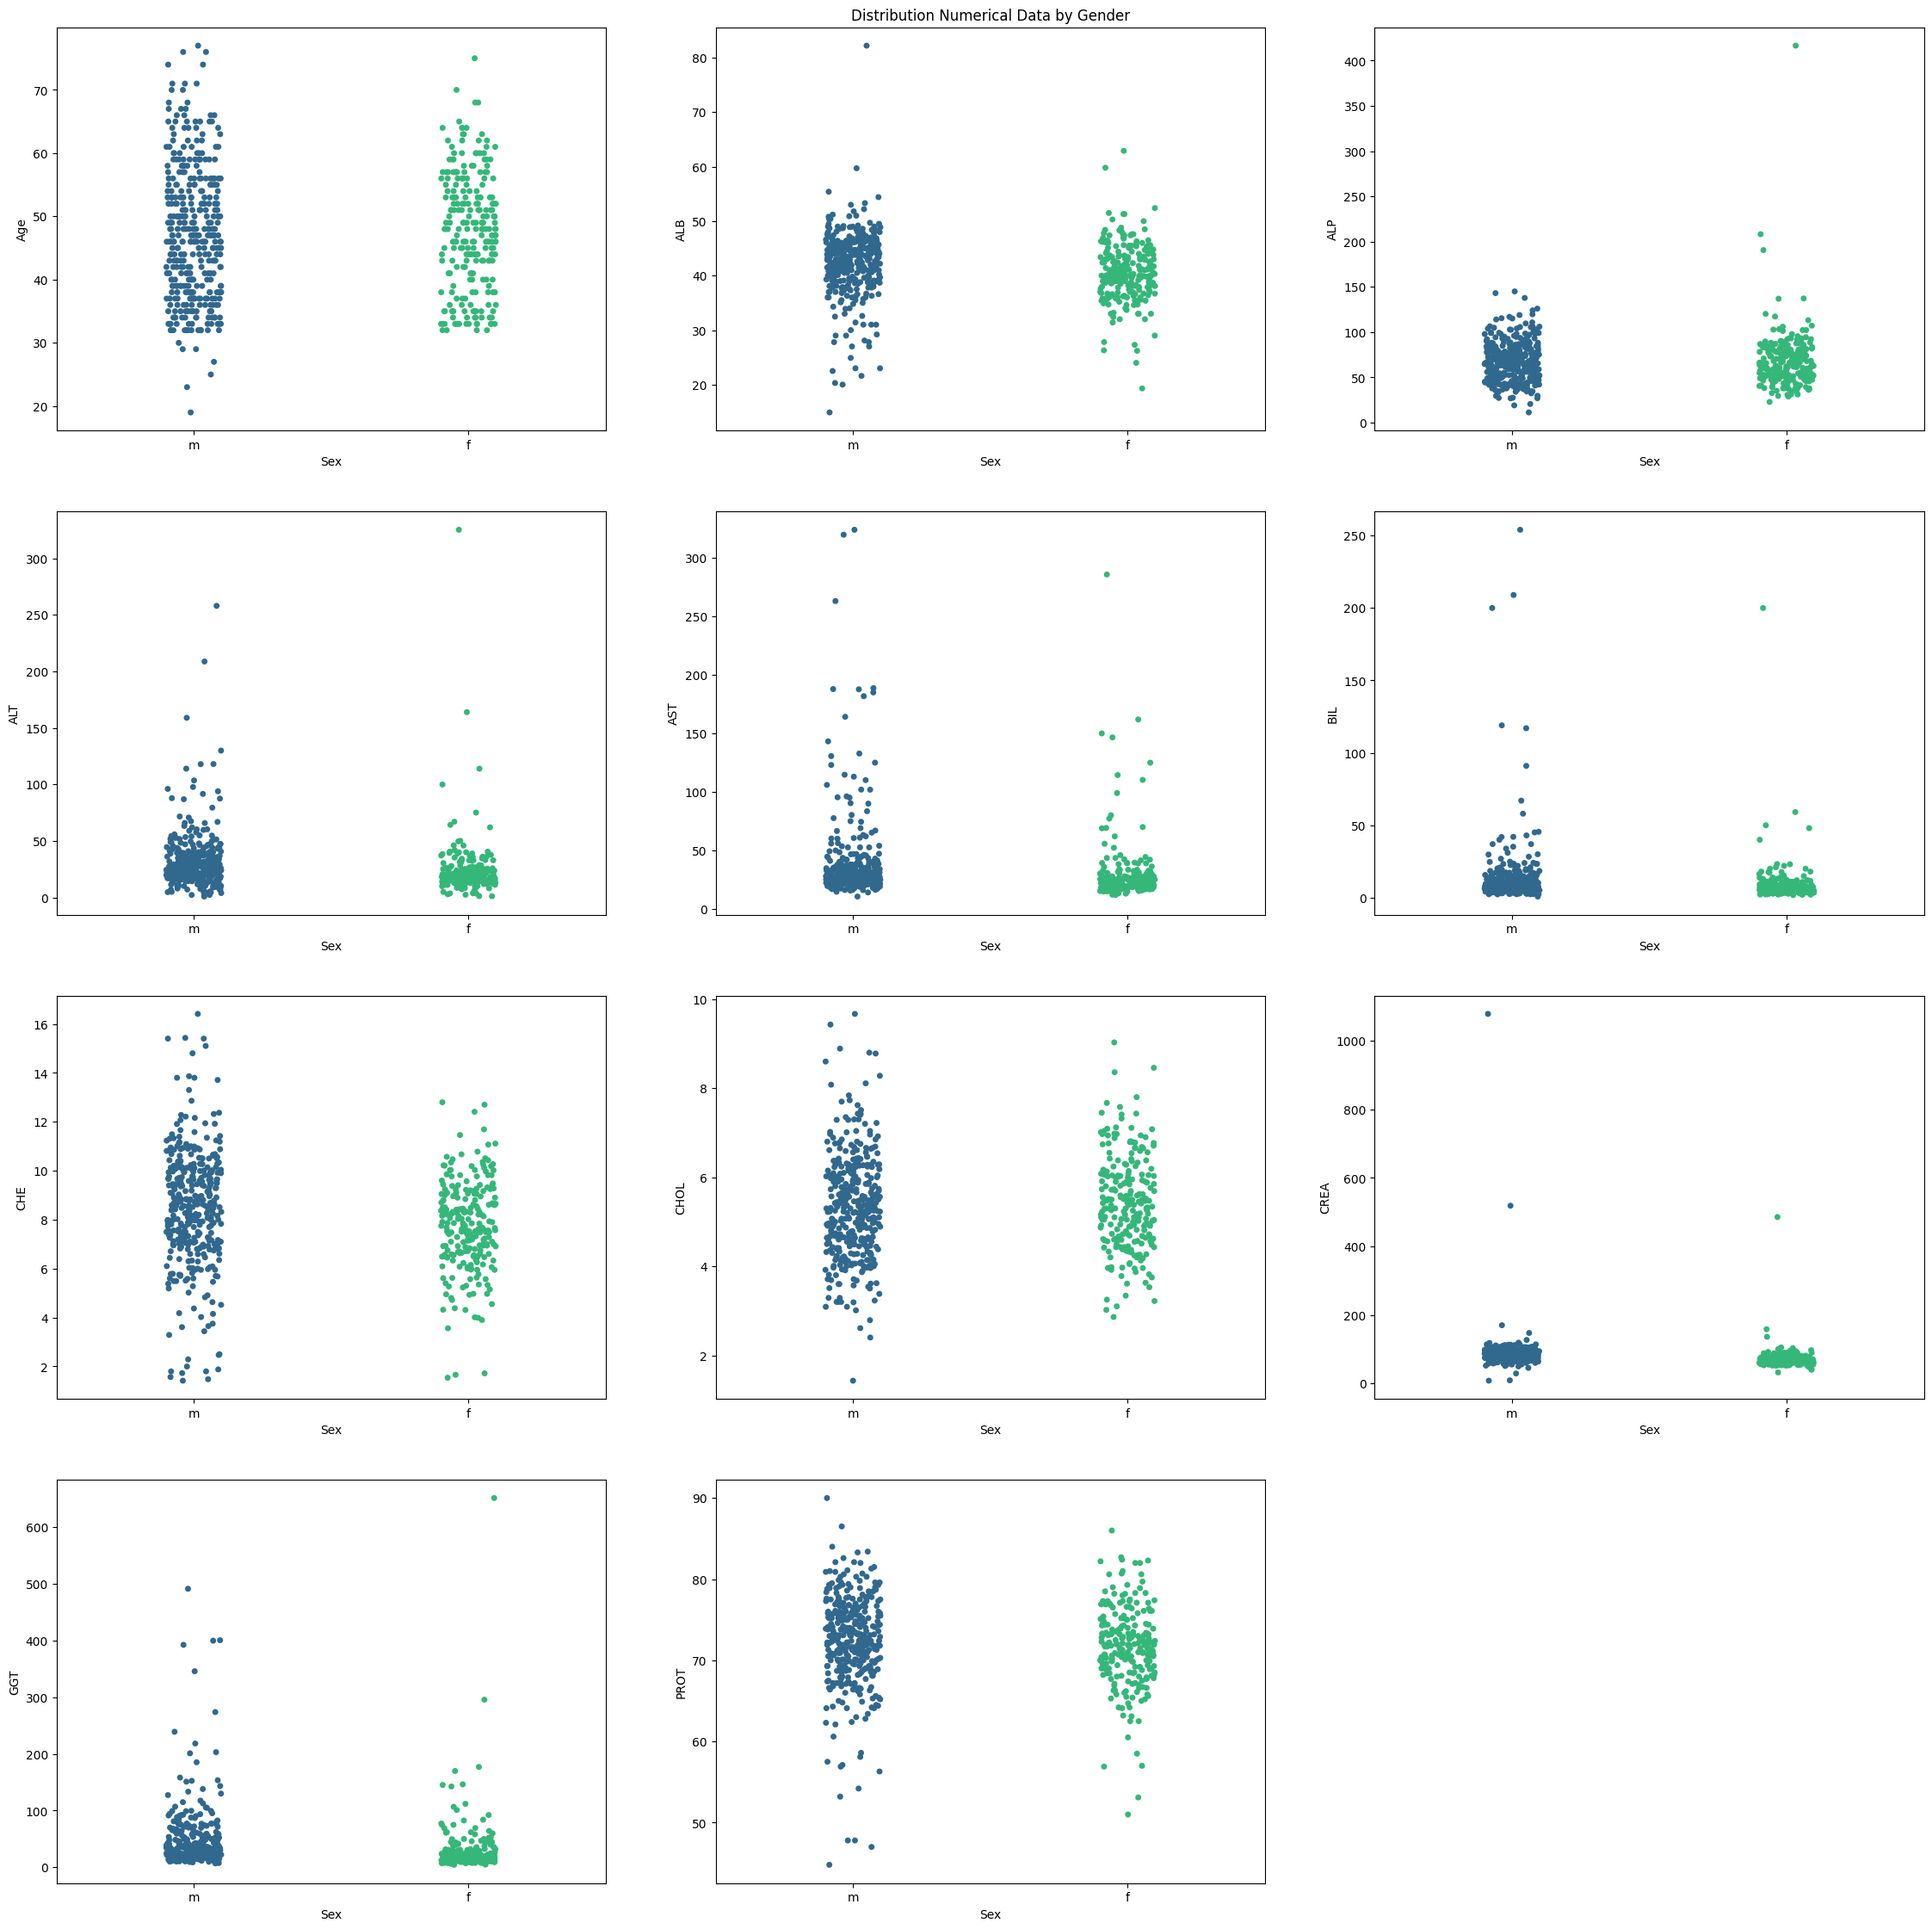

In [ ]:
plt.figure(figsize = (28, 28))
n = 0
for cols in ['Age','ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT','PROT']:
    n += 1
    plt.subplot(4 , 3 , n)
    plt.subplots_adjust(hspace = 0.2 , wspace = 0.2)
    sns.stripplot(x = 'Sex', y = cols, data = df, palette='viridis')
    plt.title('Distribution Numerical Data by Gender' if n == 2 else '')
plt.show()

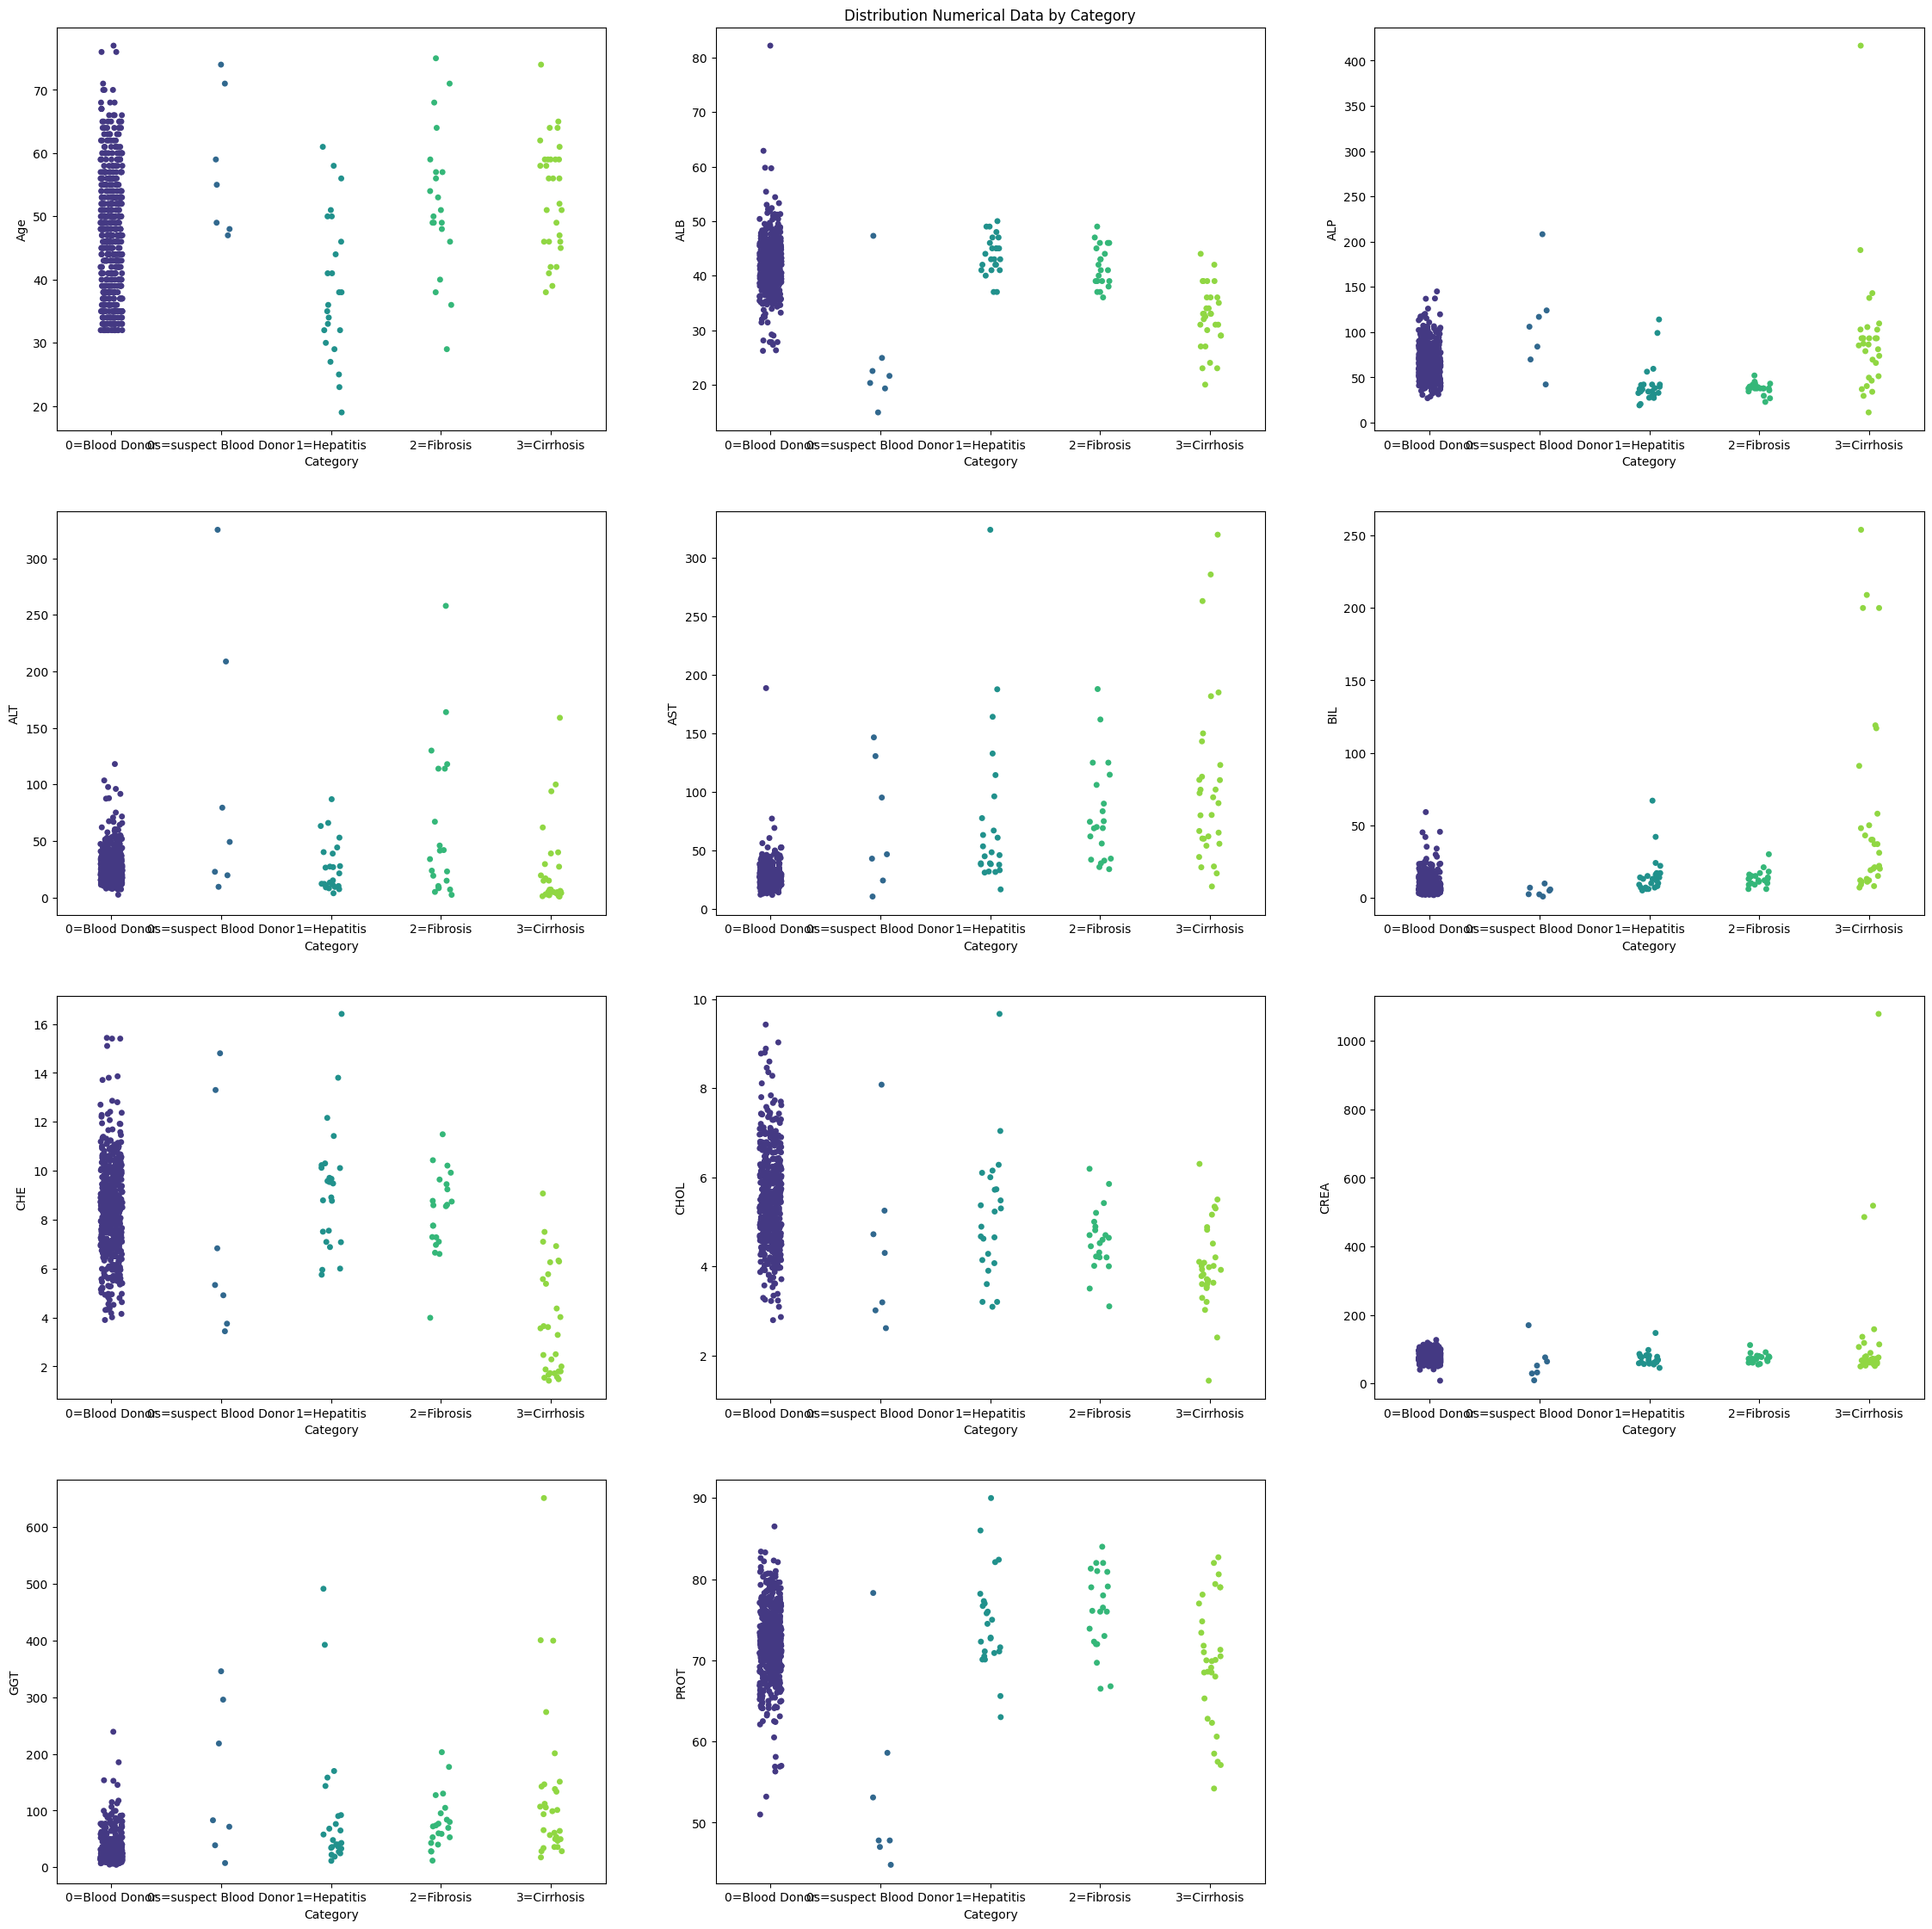

In [ ]:
plt.figure(figsize = (28, 28))
n = 0
for cols in ['Age','ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT','PROT']:
    n += 1
    plt.subplot(4 , 3 , n)
    plt.subplots_adjust(hspace = 0.2 , wspace = 0.2)
    sns.stripplot(x = 'Category', y = cols, data = df, palette='viridis')
    plt.title('Distribution Numerical Data by Category' if n == 2 else '')
plt.show()

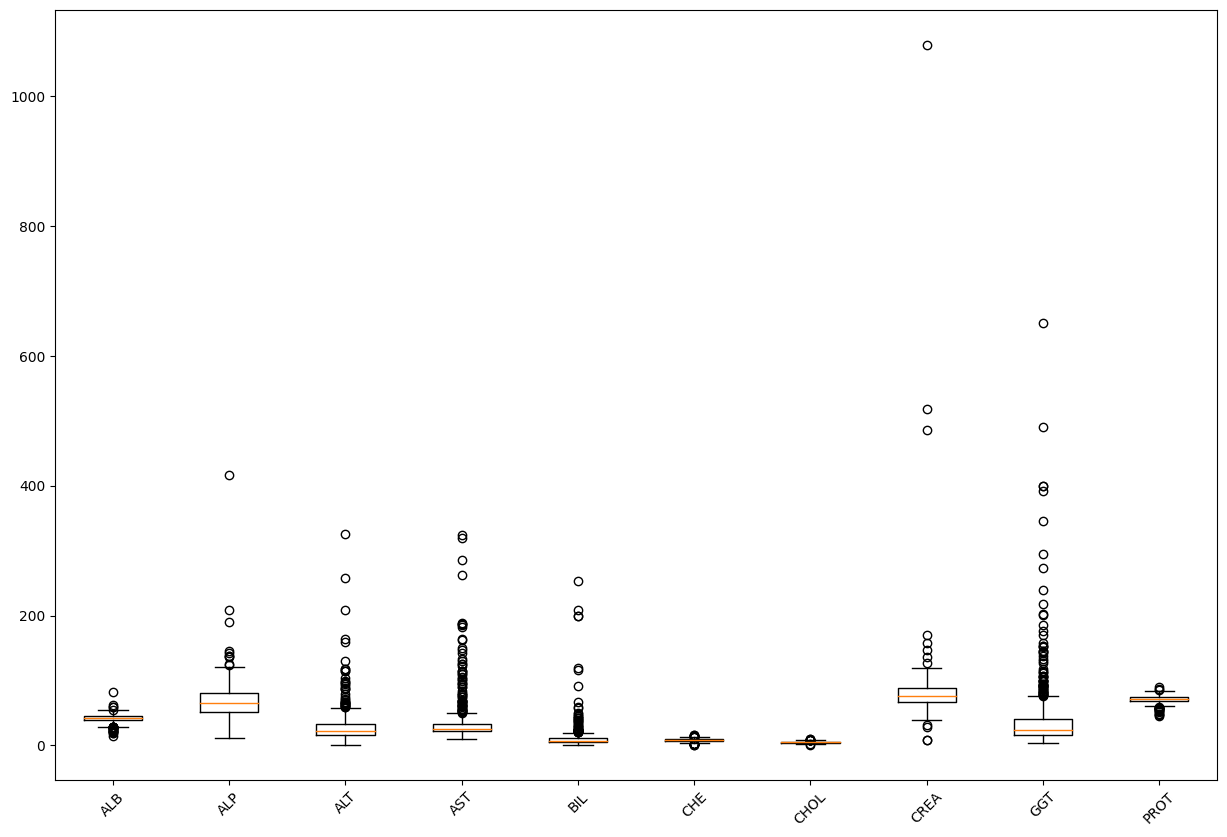

In [ ]:
columns_to_plot = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

# create a box plot for each column
plt.figure(figsize=(15,10))
plt.boxplot(df[columns_to_plot].values, labels=columns_to_plot, showfliers=True)
plt.xticks(rotation=45)
plt.show()

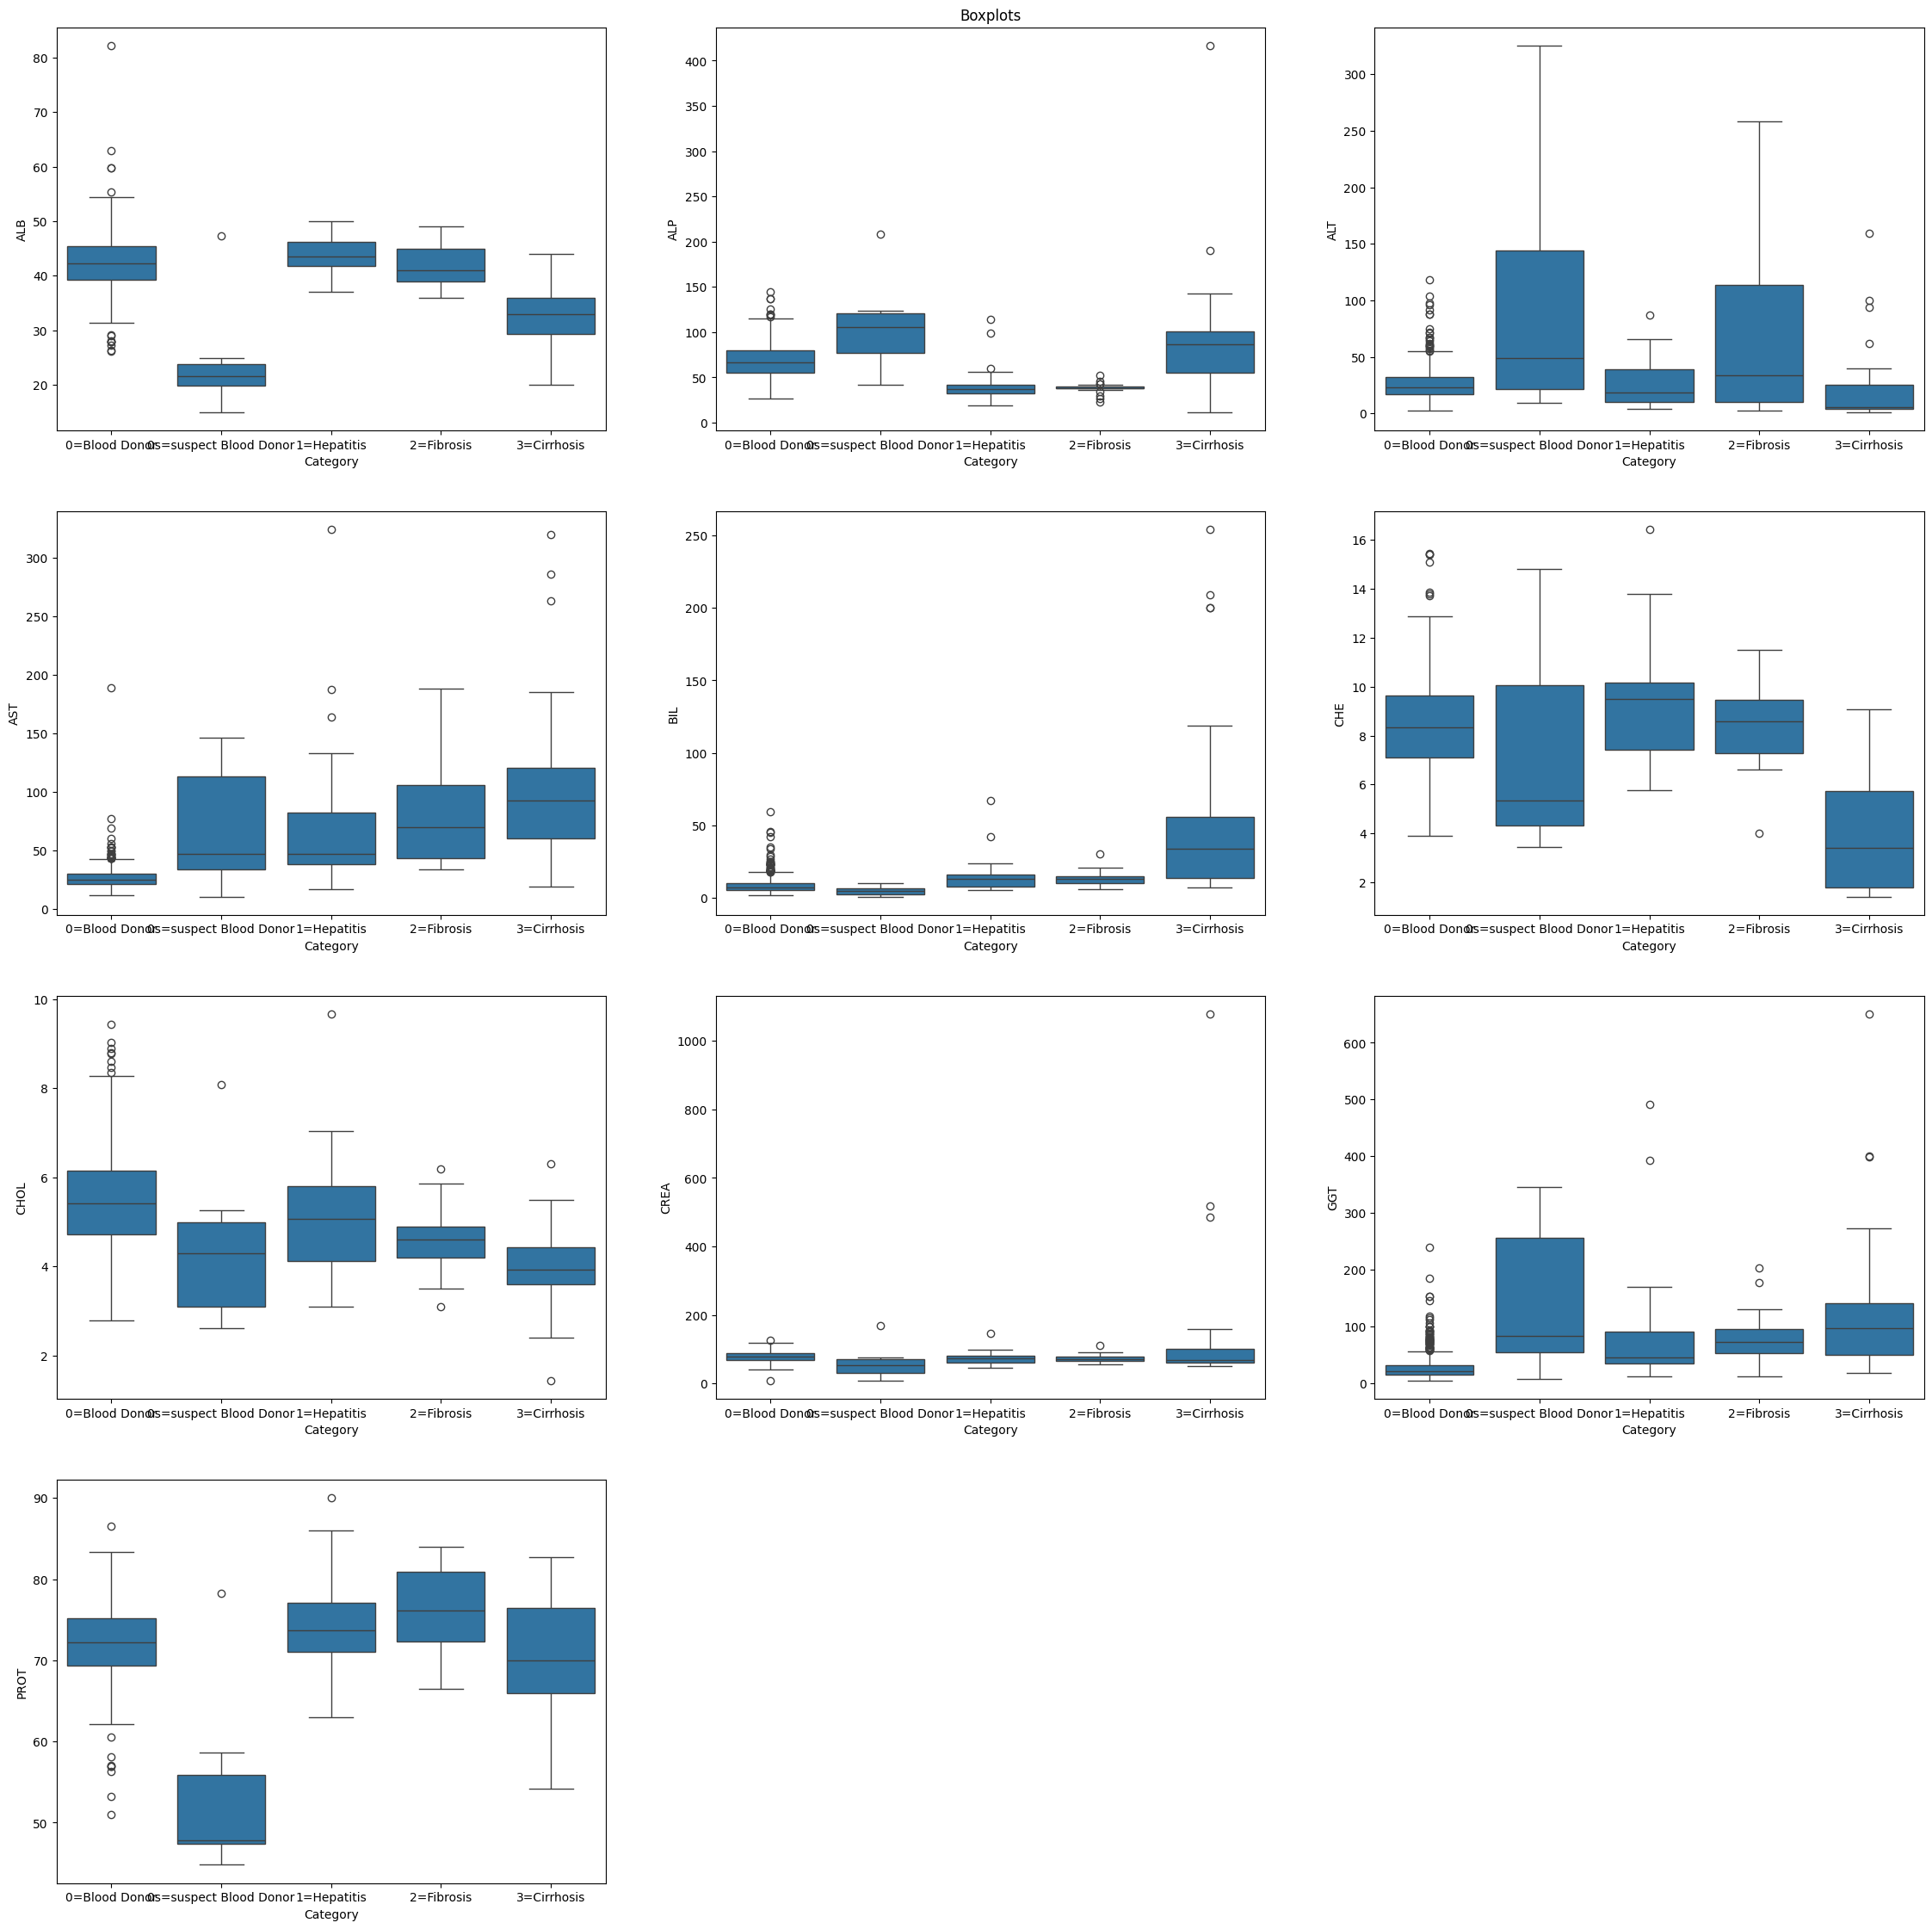

In [ ]:
plt.figure(figsize = (28, 28))
n = 0
for cols in ['ALB','ALP','ALT','AST','BIL','CHE','CHOL','CREA','GGT','PROT']:
    n += 1
    plt.subplot(4 , 3 , n)
    plt.subplots_adjust(hspace = 0.2 , wspace = 0.2)
    sns.boxplot(x = 'Category' , y = cols , data = df)
    plt.title('Boxplots' if n == 2 else '')
plt.show()

# Preprocessing

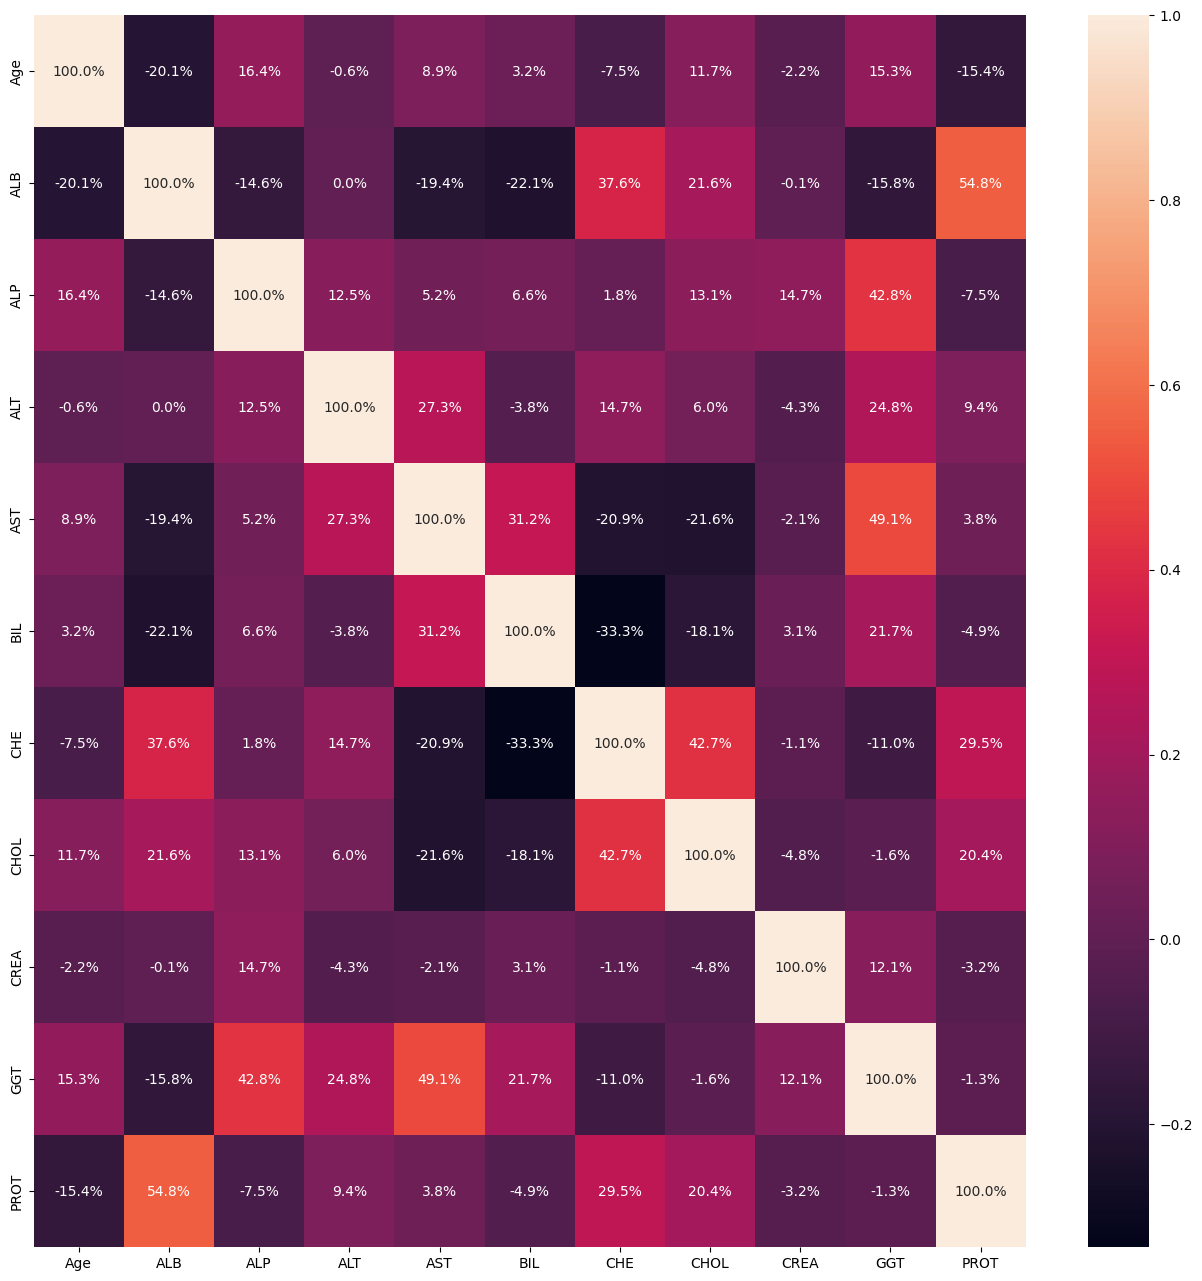

In [ ]:
corr = df.corr()
plt.figure(figsize=(16, 16))
sns.heatmap(corr, annot=True, fmt=".1%")

plt.show()

Korelasi antar atribut sebelum melakukan label encoding (merubah atribut kategorikal menjadi numerik)

In [ ]:
map = {'0s=suspect Blood Donor':0, '0=Blood Donor': 0, '1=Hepatitis': 1, '2=Fibrosis':2, '3=Cirrhosis':3}
df.Category.replace(map, inplace=True)

Label encoding pada atribut Category

In [ ]:
map = {'m': 0, 'f': 1}
df.Sex.replace(map, inplace=True)

Label encoding pada atribut Sex

In [ ]:
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,0,38.5,52.500000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0,32,0,38.5,70.300000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0,32,0,46.9,74.700000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0,32,0,43.2,52.000000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0,32,0,39.2,74.100000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3,62,1,32.0,416.600000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3,64,1,24.0,102.800000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,3,64,1,29.0,87.300000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,3,46,1,33.0,93.220833,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [ ]:
columns_to_handle = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

mean_values = df[columns_to_handle].mean()
q1_values = df[columns_to_handle].quantile(0.25)
q3_values = df[columns_to_handle].quantile(0.75)

# Mengidentifikasi dan mengubah nilai yang melebihi q3
for column in columns_to_handle:
    mask_above_q3 = df[column] > q3_values[column]
    df.loc[mask_above_q3, column] = np.random.uniform(mean_values[column], q3_values[column], np.sum(mask_above_q3))

# Mengidentifikasi dan mengubah nilai yang kurang dari q1
for column in columns_to_handle:
    mask_below_q1 = df[column] < q1_values[column]
    df.loc[mask_below_q1, column] = np.random.uniform(q1_values[column], mean_values[column], np.sum(mask_below_q1))

In [ ]:
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0,32,0,40.539220,52.500000,17.685883,22.100000,7.500000,7.552972,4.853676,87.037488,31.571416,71.185562
1,0,32,0,39.666930,70.300000,18.000000,24.700000,6.913927,8.445787,4.800000,74.000000,31.757807,74.740559
2,0,32,0,44.635492,74.700000,28.851802,32.997272,6.100000,8.840000,5.200000,86.000000,33.200000,74.771655
3,0,32,0,43.200000,67.653059,30.600000,22.600000,11.312002,7.330000,4.740000,80.000000,33.800000,73.967696
4,0,32,0,39.200000,74.100000,32.600000,24.800000,9.600000,9.150000,5.048373,76.000000,29.900000,69.860882
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3,62,1,40.724256,70.742728,21.916517,34.733810,11.345044,7.212885,5.765574,79.780872,40.140250,69.790704
611,3,64,1,38.800146,75.694270,19.286923,33.352046,11.319936,6.964812,5.220040,75.376978,35.900000,71.300000
612,3,64,1,39.608569,73.794453,17.478593,34.656161,11.210874,7.446280,5.051084,80.382160,39.610728,74.919437
613,3,46,1,38.958716,75.434136,32.100194,33.455779,11.210344,7.059580,4.832581,79.700953,40.016657,71.000000


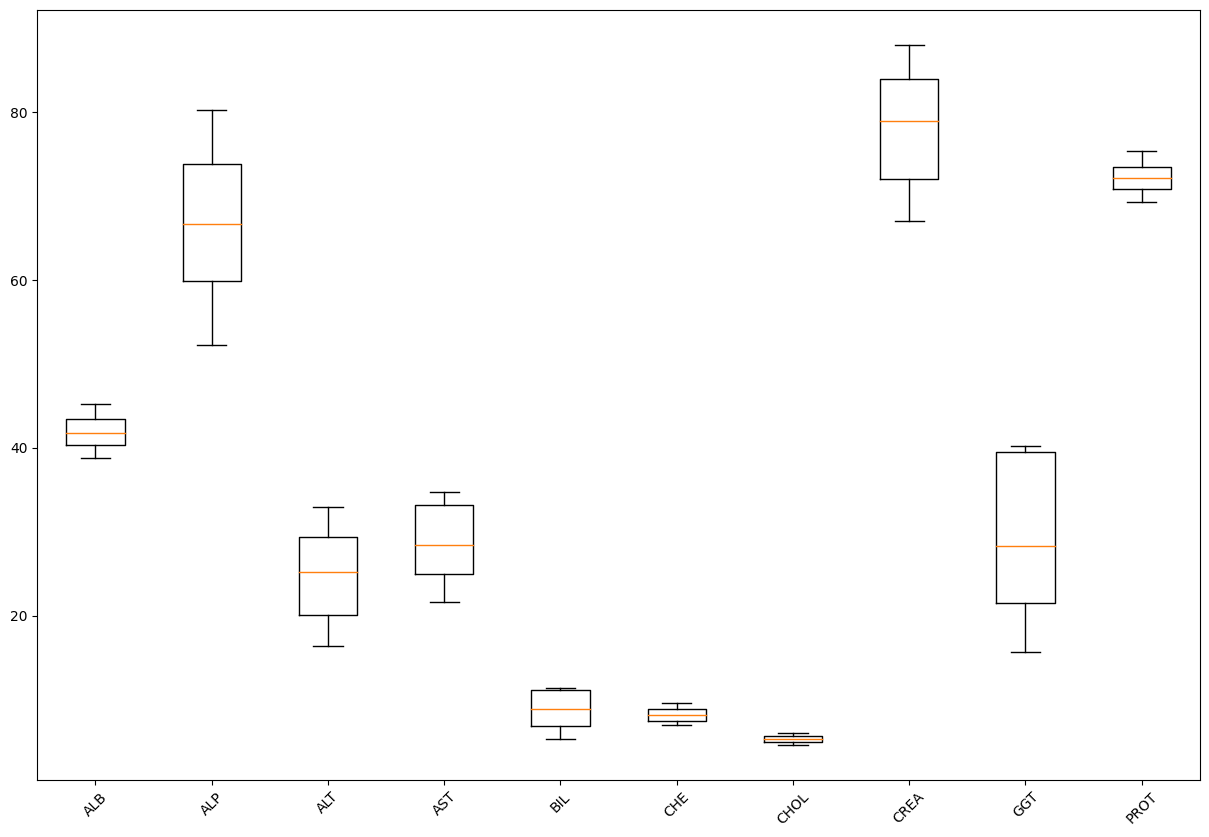

In [ ]:
columns_to_plot = ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE', 'CHOL', 'CREA', 'GGT', 'PROT']

# create a box plot for each column
plt.figure(figsize=(15,10))
plt.boxplot(df[columns_to_plot].values, labels=columns_to_plot, showfliers=True)
plt.xticks(rotation=45)
plt.show()

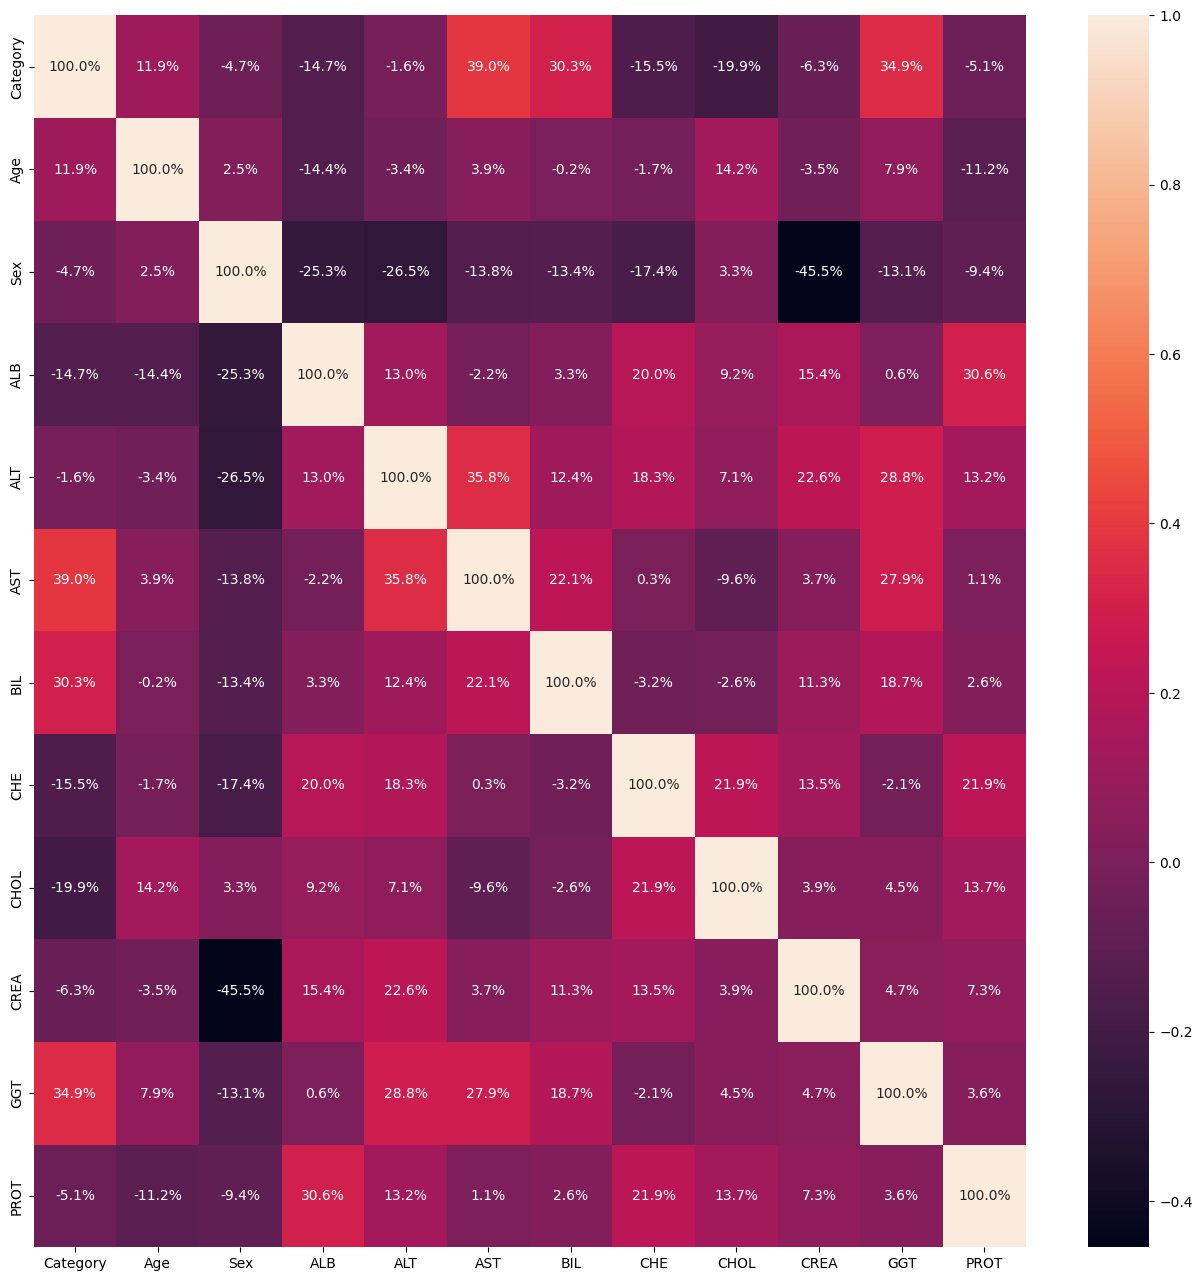

In [ ]:
corr = df.corr()
plt.figure(figsize=(16, 16))
threshold = 0.1
columns_to_drop = []
for column in corr.columns:
    if abs(corr[column].loc[corr.columns != column].min()) < threshold:
        columns_to_drop.append(column)

new_df = df.copy()
new_df.drop(columns=columns_to_drop, inplace=True)
correlation = new_df.corr()
sns.heatmap(correlation, annot=True, fmt=".1%")

plt.show()

Hasil heat map setelah dilakukan label encoding dan robust scaler

## Standarisasi Data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(new_df.drop('Category', axis=1))
scaled_features = scaler.transform(new_df.drop('Category',axis=1))
df_feat = pd.DataFrame(scaled_features, columns=new_df.columns[:-1])
df_feat.head()

,Category,Age,Sex,ALB,ALT,AST,BIL,CHE,CHOL,CREA,GGT
0,-1.533616,-0.794544,-0.730001,-1.427326,-1.568318,-0.602721,-0.858620,-1.104811,1.366889,0.286969,-0.621684
1,-1.533616,-0.794544,-1.203254,-1.365072,-0.949427,-0.879871,0.313681,-1.232380,-0.659397,0.309039,1.495485
2,-1.533616,-0.794544,1.492393,0.785634,1.025617,-1.264771,0.831298,-0.281715,1.205643,0.479805,1.514004
3,-1.533616,-0.794544,0.713580,1.132108,-1.449301,1.199946,-1.151391,-1.374980,0.273123,0.550849,1.035208
4,-1.533616,-0.794544,-1.456583,1.528485,-0.925623,0.390353,1.238340,-0.642082,-0.348557,0.089062,-1.410593


Karena atribut antar data memiliki rentang data yang cukup jauh, maka kita perlu melakukan standarisasi agar hasil prediksi bisa maksimal. Atribut category kita gunakan sebagai target prediksi kita.

## Split Dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(scaled_features, df['Category'], test_size=0.20)

In [ ]:
X_train

array([[-1.43408325, -0.79454373, -0.53426344, ...,  1.09842466,
        -1.39532301,  0.1015714 ],
       [-0.73735282,  1.25858397,  0.71358014, ...,  1.51648255,
         0.68979442,  0.57800909],
       [-0.6378199 , -0.79454373, -1.05247154, ...,  0.73938264,
        -1.24893918, -0.19620215],
       ...,
       [-0.1401553 , -0.79454373, -0.59880343, ...,  1.20038714,
         1.30197844, -1.29693749],
       [-0.23968822, -0.79454373,  1.46807416, ...,  1.22726899,
         1.29459378,  1.28476939],
       [ 1.05423974, -0.79454373,  0.605072  , ...,  1.07901213,
         1.24048258, -1.66647404]])

In [ ]:
Y_train

16     0
369    0
107    0
371    0
378    0
      ..
19     0
213    0
590    3
146    0
559    1
Name: Category, Length: 492, dtype: int64

In [ ]:
Y_test

381    0
117    0
60     0
289    0
151    0
      ..
591    3
565    2
382    0
491    0
513    0
Name: Category, Length: 123, dtype: int64

Kita akan membagi dataset menjadi dua bagian, dimana perbandingannya adalah 80% data train dan 20% data test

# Modelling ML

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)
pred_knn_before = knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print (confusion_matrix(Y_test, pred_knn_before))
print (classification_report(Y_test, pred_knn_before))
print ('Accuracy Score: ' + str(accuracy_score(Y_test, pred_knn_before)))

[[112   0   0   0]
 [  5   0   0   0]
 [  0   1   0   0]
 [  4   0   0   1]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       112
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         1
           3       1.00      0.20      0.33         5

    accuracy                           0.92       123
   macro avg       0.48      0.30      0.32       123
weighted avg       0.88      0.92      0.89       123

Accuracy Score: 0.9186991869918699


Karena nilai K masih default, maka kita bisa eksplorasi dengan berbagai macam nilai K

### Check Best Value of K for KNN

In [ ]:
error_rate = []

for i in range(1,40): # Checking every possible k value between 1-40
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != Y_test))

error_rate

[0.10569105691056911,
 0.06504065040650407,
 0.08943089430894309,
 0.08943089430894309,
 0.08130081300813008,
 0.08943089430894309,
 0.07317073170731707,
 0.08943089430894309,
 0.08943089430894309,
 0.0975609756097561,
 0.0975609756097561,
 0.0975609756097561,
 0.08943089430894309,
 0.0975609756097561,
 0.0975609756097561,
 0.0975609756097561,
 0.0975609756097561,
 0.0975609756097561,
 0.0975609756097561,
 0.0975609756097561,
 0.0975609756097561,
 0.0975609756097561,
 0.0975609756097561,
 0.0975609756097561,
 0.0975609756097561,
 0.0975609756097561,
 0.0975609756097561,
 0.0975609756097561,
 0.0975609756097561,
 0.10569105691056911,
 0.0975609756097561,
 0.10569105691056911,
 0.10569105691056911,
 0.10569105691056911,
 0.10569105691056911,
 0.10569105691056911,
 0.10569105691056911,
 0.10569105691056911,
 0.10569105691056911]

Text(0, 0.5, 'Mean error rate')

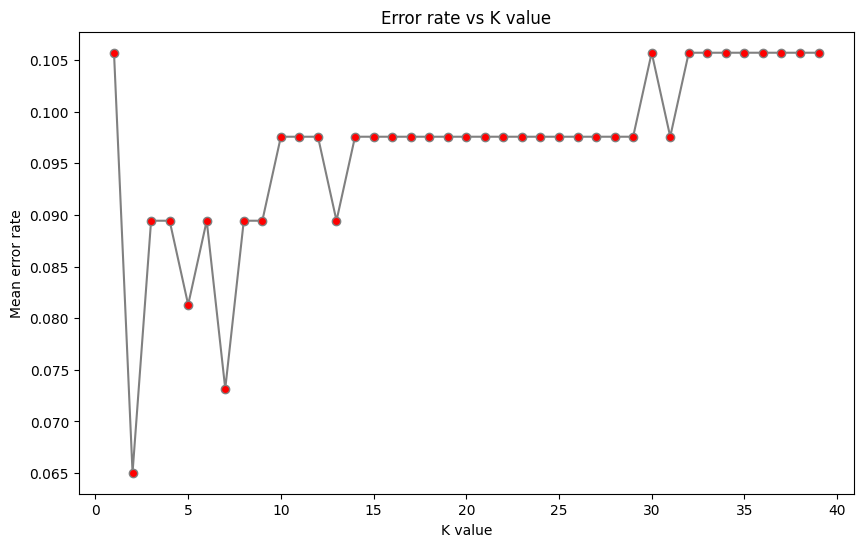

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), error_rate, color='grey', marker='o', markerfacecolor='red')
plt.title('Error rate vs K value')
plt.xlabel('K value')
plt.ylabel('Mean error rate')

Kita bisa mencoba dengan nilai K=2 karena nilai error paling rendah

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models_name = []
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []

In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, Y_train)
pred_knn_after = knn.predict(X_test)

accuracy_list.append(accuracy_score(Y_test, pred_knn_after))
precision_list.append(precision_score(Y_test, pred_knn_after, average='weighted'))
recall_list.append(recall_score(Y_test, pred_knn_after, average='weighted'))
f1_score_list.append(f1_score(Y_test, pred_knn_after, average='weighted'))
models_name.append('Random Forest')

print("Model:", models_name[-1])
print("Accuracy:", accuracy_list[-1])
print("Precision:", precision_list[-1])
print("Recall:", recall_list[-1])
print("F1 Score:", f1_score_list[-1])

Model: Random Forest
Accuracy: 0.9186991869918699
Precision: 0.9138762574066418
Recall: 0.9186991869918699
F1 Score: 0.9015637361342559


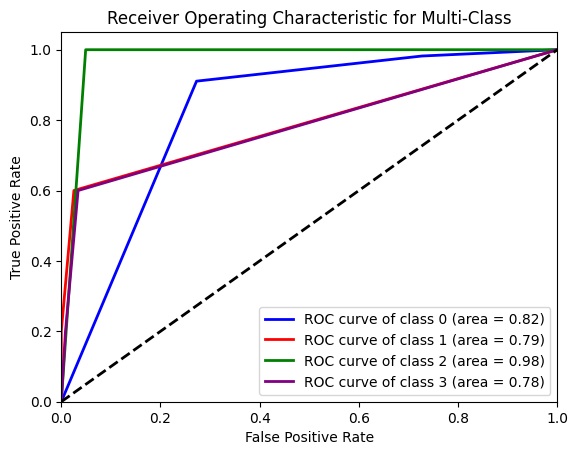

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc, roc_auc_score
import numpy as np

# Binarize the output
y_test_binarized = label_binarize(Y_test, classes=np.unique(Y_train))
n_classes = y_test_binarized.shape[1]

# Dapatkan skor probabilitas untuk semua kelas
y_score = knn.predict_proba(X_test)

# Hitung ROC curve dan ROC area untuk setiap kelas
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Membuat plot ROC curve untuk setiap kelas
plt.figure()
colors = ['blue', 'red', 'green', 'purple', 'orange']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multi-Class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
models_name = []
accuracy = []

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, Y_train)
pred_knn_after = knn.predict(X_test)

accuracy.append(accuracy_score(Y_test, pred_knn_after))
models_name.append('KNN')

print (confusion_matrix(Y_test, pred_knn_after))
print (classification_report(Y_test, pred_knn_after))
print ('Accuracy Score: ' + str(accuracy_score(Y_test, pred_knn_after)))

[[110   0   1   1]
 [  4   1   0   0]
 [  0   0   1   0]
 [  4   0   0   1]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       112
           1       1.00      0.20      0.33         5
           2       0.50      1.00      0.67         1
           3       0.50      0.20      0.29         5

    accuracy                           0.92       123
   macro avg       0.73      0.60      0.56       123
weighted avg       0.91      0.92      0.90       123

Accuracy Score: 0.9186991869918699


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, Y_train)
pred_lr = lr.predict(X_test)
accuracy.append(accuracy_score(Y_test, pred_lr))
models_name.append('Logistic Regression')

In [ ]:
print (confusion_matrix(Y_test, pred_lr))
print (classification_report(Y_test, pred_lr))
print ('Accuracy Score: ' + str(accuracy_score(Y_test, pred_lr)))

[[108   1   0   1]
 [  3   2   0   1]
 [  1   1   0   2]
 [  1   0   0   2]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       110
           1       0.50      0.33      0.40         6
           2       0.00      0.00      0.00         4
           3       0.33      0.67      0.44         3

    accuracy                           0.91       123
   macro avg       0.45      0.50      0.45       123
weighted avg       0.89      0.91      0.90       123

Accuracy Score: 0.9105691056910569


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtree_gini = DecisionTreeClassifier(criterion="gini", max_depth=None)
dtree_gini.fit(X_train, Y_train)
pred_dtree_gini = dtree_gini.predict(X_test)
accuracy.append(accuracy_score(Y_test, pred_dtree_gini))
models_name.append('Dtree Gini')

dtree_entropy = DecisionTreeClassifier(criterion="entropy", max_depth=None)
dtree_entropy.fit(X_train, Y_train)
pred_dtree_entropy = dtree_entropy.predict(X_test)
accuracy.append(accuracy_score(Y_test, pred_dtree_entropy))
models_name.append('Dtree Entropy')

In [ ]:
print (confusion_matrix(Y_test, pred_dtree_gini))
print (classification_report(Y_test, pred_dtree_gini))
print ('Accuracy Score: ' + str(accuracy_score(Y_test, pred_dtree_gini)))

[[100   4   3   3]
 [  3   1   1   1]
 [  0   1   1   2]
 [  1   0   0   2]]
              precision    recall  f1-score   support

           0       0.96      0.91      0.93       110
           1       0.17      0.17      0.17         6
           2       0.20      0.25      0.22         4
           3       0.25      0.67      0.36         3

    accuracy                           0.85       123
   macro avg       0.39      0.50      0.42       123
weighted avg       0.88      0.85      0.86       123

Accuracy Score: 0.8455284552845529


In [ ]:
print (confusion_matrix(Y_test, pred_dtree_entropy))
print (classification_report(Y_test, pred_dtree_entropy))
print ('Accuracy Score: ' + str(accuracy_score(Y_test, pred_dtree_entropy)))

[[101   3   4   2]
 [  3   1   1   1]
 [  1   0   1   2]
 [  0   0   0   3]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       110
           1       0.25      0.17      0.20         6
           2       0.17      0.25      0.20         4
           3       0.38      1.00      0.55         3

    accuracy                           0.86       123
   macro avg       0.44      0.58      0.47       123
weighted avg       0.89      0.86      0.87       123

Accuracy Score: 0.8617886178861789


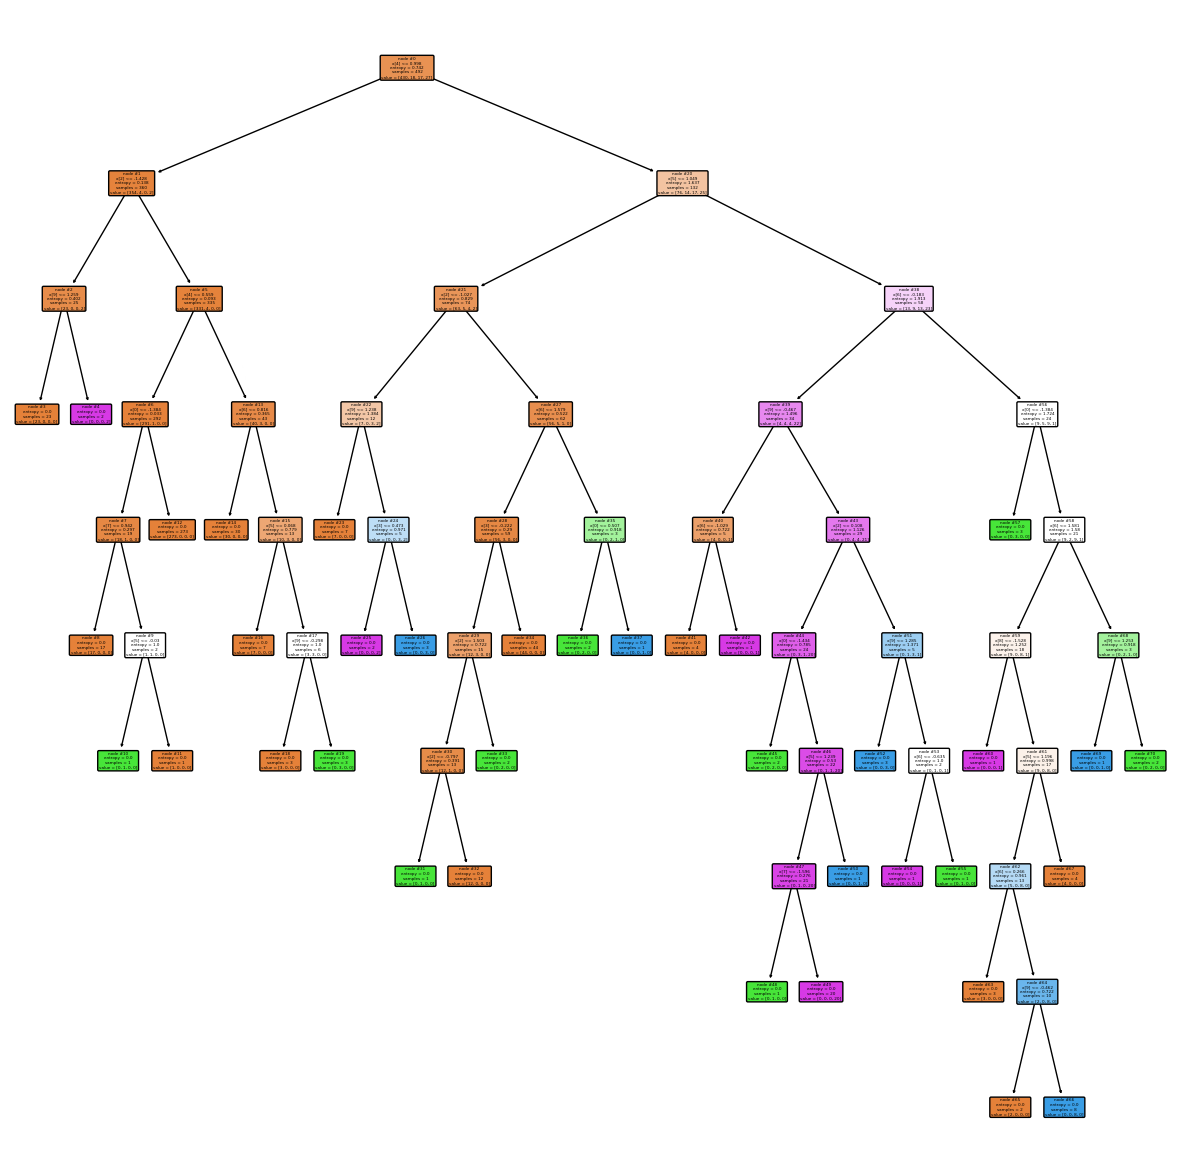

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,15))
plot_tree(dtree_entropy, max_depth = None,
            rounded = True,
            filled = True,
            impurity = True,
            node_ids = True,
          )
plt.show()

## Naive Bayes Gaussian

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_gaussian = GaussianNB()
nb_gaussian.fit(X_train, Y_train)
pred_nb_gaussian = nb_gaussian.predict(X_test)

accuracy.append(accuracy_score(Y_test, pred_nb_gaussian))
models_name.append('Naive Bayes Gaussian')

In [ ]:
print (confusion_matrix(Y_test, pred_nb_gaussian))
print (classification_report(Y_test, pred_nb_gaussian))
print ('Accuracy Score: ' + str(accuracy_score(Y_test, pred_nb_gaussian)))

[[101   4   4   1]
 [  3   1   2   0]
 [  1   0   2   1]
 [  1   0   1   1]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.94       110
           1       0.20      0.17      0.18         6
           2       0.22      0.50      0.31         4
           3       0.33      0.33      0.33         3

    accuracy                           0.85       123
   macro avg       0.43      0.48      0.44       123
weighted avg       0.88      0.85      0.86       123

Accuracy Score: 0.8536585365853658


## Support Vector Machine

In [ ]:
from sklearn.svm import SVC

svm_rbf = SVC(kernel="rbf")
svm_rbf.fit(X_train, Y_train)
pred_svm_rbf = svm_rbf.predict(X_test)
accuracy.append(accuracy_score(Y_test, pred_svm_rbf))
models_name.append('SVM Kernel RBF')

svm_linear = SVC(kernel="linear")
svm_linear.fit(X_train, Y_train)
pred_svm_linear = svm_rbf.predict(X_test)
accuracy.append(accuracy_score(Y_test, pred_svm_linear))
models_name.append('SVM Kernel Linear')

svm_poly = SVC(kernel="poly")
svm_poly.fit(X_train, Y_train)
pred_svm_poly = svm_poly.predict(X_test)
accuracy.append(accuracy_score(Y_test, pred_svm_poly))
models_name.append('SVM Kernel Poly')

In [ ]:
print (confusion_matrix(Y_test, pred_svm_rbf))
print (classification_report(Y_test, pred_svm_rbf))
print ('Accuracy Score: ' + str(accuracy_score(Y_test, pred_svm_rbf)))

[[109   0   0   1]
 [  6   0   0   0]
 [  3   0   0   1]
 [  1   0   0   2]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       110
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         4
           3       0.50      0.67      0.57         3

    accuracy                           0.90       123
   macro avg       0.35      0.41      0.38       123
weighted avg       0.83      0.90      0.87       123

Accuracy Score: 0.9024390243902439


In [ ]:
print (confusion_matrix(Y_test, pred_svm_linear))
print (classification_report(Y_test, pred_svm_linear))
print ('Accuracy Score: ' + str(accuracy_score(Y_test, pred_svm_linear)))

[[109   0   0   1]
 [  6   0   0   0]
 [  3   0   0   1]
 [  1   0   0   2]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       110
           1       0.00      0.00      0.00         6
           2       0.00      0.00      0.00         4
           3       0.50      0.67      0.57         3

    accuracy                           0.90       123
   macro avg       0.35      0.41      0.38       123
weighted avg       0.83      0.90      0.87       123

Accuracy Score: 0.9024390243902439


In [ ]:
print (confusion_matrix(Y_test, pred_svm_poly))
print (classification_report(Y_test, pred_svm_poly))
print ('Accuracy Score: ' + str(accuracy_score(Y_test, pred_svm_poly)))

[[109   0   0   1]
 [  5   1   0   0]
 [  3   0   0   1]
 [  2   0   0   1]]
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       110
           1       1.00      0.17      0.29         6
           2       0.00      0.00      0.00         4
           3       0.33      0.33      0.33         3

    accuracy                           0.90       123
   macro avg       0.56      0.37      0.39       123
weighted avg       0.88      0.90      0.87       123

Accuracy Score: 0.9024390243902439


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=None)
rf.fit(X_train, Y_train)
pred_rf = rf.predict(X_test)
accuracy.append(accuracy_score(Y_test, pred_rf))
models_name.append('Random Forest')

In [ ]:
print (confusion_matrix(Y_test, pred_rf))
print (classification_report(Y_test, pred_rf))
print ('Accuracy Score: ' + str(accuracy_score(Y_test, pred_rf)))

[[109   0   0   1]
 [  4   1   1   0]
 [  1   1   0   2]
 [  1   0   0   2]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       110
           1       0.50      0.17      0.25         6
           2       0.00      0.00      0.00         4
           3       0.40      0.67      0.50         3

    accuracy                           0.91       123
   macro avg       0.46      0.46      0.43       123
weighted avg       0.88      0.91      0.89       123

Accuracy Score: 0.9105691056910569


## Perbandingan Model ML

In [ ]:
data = {'Model': models_name, 'Akurasi Prediksi': accuracy}
evaluation = pd.DataFrame(data)
evaluation = evaluation.sort_values(by='Akurasi Prediksi', ascending=False)
evaluation

,Model,Akurasi Prediksi
0,KNN,0.934959
1,Logistic Regression,0.910569
8,Random Forest,0.910569
5,SVM Kernel RBF,0.902439
6,SVM Kernel Linear,0.902439
7,SVM Kernel Poly,0.902439
3,Dtree Entropy,0.861789
4,Naive Bayes Gaussian,0.853659
2,Dtree Gini,0.845528
